## The refractive index of aqueous media
determine the refractive index of aerosol at a given RH and wavelength(s)
for binary solutions

In [334]:
solute='SS'

### Possible solutes
CA = citric acid, 
NaCl = sodium chloride, 
AS = ammonium sulphate,  
NaNO3 = sodium nitrate, 
MgSO4 = magnesium sulphate,
Sucrose = sucrose,
SS = sodium sulphate,
LiCl = lithium chloride,
KCl = potassium chloride, 
KBr = potassium bromide,
NaBr = sodium bromide, 
CaCl2 = calcium chloride,
NH4Cl = ammonium chloride,
TA = tartaric acid,
MgCl2 = magnesium chloride,
Mannose = mannose,
NaHSO4 = sodium bisulphate

In [335]:
# import packages
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.optimize import brentq
from scipy import optimize as opt   

### General varriables and functions

In [418]:
rh=np.array([60,70,80,90,100]) # set RH in %
wavelength=np.linspace(0.300,0.800,510) # wavelength in microns

Tc=295 # temp in K most activity parameterizations are only valid at 295
MA = 18.015/1000 #molecular mass of water

def wB(xA):
    return 1-(xA*MA)/(xA*MA+(1-xA)*MB)
    
def xA(wB):
    return ((1-wB)/MA)/((wB/MB)+((1-wB)/MA))
    
def xB(wB):
    return 1-xA(wB)

Awat=np.array([5.689093832e-1,1.719708856e-1,2.062501582e-2,1.123965424e-1])
lambda2=np.array([5.110301794e-3,1.825180155e-2,2.624158904e-2,1.067505178e1])

def n_water_Daimon(wavelength):
    n_water=[]
    for i in range(len(wavelength)):
        t=[]
        for j in range(len(Awat)):
            top=Awat[j]*wavelength[i]*wavelength[i]
            bottom=(wavelength[i]*wavelength[i])-lambda2[j]
            t1=top/bottom
            t.append(t1)
        l=(1+sum(t))**0.5
        n_water.append(l)
    return n_water

def phi_s(wB):
    wb=[]
    for i in range(len(wB)):
        wb1=wB[i]*rho(wB[i])/rho(1)
        wb.append(wb1)
    return wb

def phi_w(wB):
    ws=[]
    for i in range(len(wB)):
        ws1=(1-wB[i])*rho(wB[i])/rho(0) 
        ws.append(ws1)
    return ws

def freq_to_wavelength(nu):
    return 1/nu

def n(nu,wB,aL,nu0,Gamma):
    n_nu_wb=[]
    pw=phi_w(wB)
    ps=phi_s(wB)
    lam=freq_to_wavelength(nu)
    nwat=n_water_Daimon(lam)
    for j in range(len(pw)):
        n_nu_i=[] 
        for i in range(len(lam)):
            n_w=pw[j]*(nwat[i]-1)
            osc=nu0*(nu0**2-nu[i]**2+(Gamma/2)**2)/((nu0**2-nu[i]**2+(Gamma/2)**2)**2+(nu[i]*Gamma)**2)
            n_s=1+(2*aL*ps[j]/math.pi)*osc
            n_i=n_s+n_w
            n_nu_i.append(n_i)
        n_nu_wb.append(n_nu_i)
    return n_nu_wb

def WB(rh):
    aw_dat=[]
    for i in range(len(rh)):
        aw_dat_i=rh[i]/100 # RH to activity
        aw_dat_j=aw_dat_i-aw_fun(rh[i])
        aw_dat.append(aw_dat_j)
    return aw_dat

### Set up solute dependant varriables 

In [419]:
if solute == 'CA':
    MB=192.124/1000 #molecular mass of citric acid
    d0=0.9971
    d1=0.38804
    d2=0.19537
    def rho(wB):
        return 1000*(d0+d1*wB+d2*wB**2)

    def aw_fun(wB):
        return (1-wB)/(1+qact(Tc)*wB+ract(Tc)*wB**2)
    
    def qact(temp):
        return a1+a2*temp+a3*temp**2
    
    def ract(temp):
        return a4+a5*temp+a6*temp**2

    a1 = -3.16761
    a2 = 0.01939
    a3 = -4.02725e-5
    a4 = 6.59108
    a5 = -0.05294
    a6 = 1.06028e-4
    
    aL=7.79631
    nu0=10.3667
    Gamma=0
    
elif solute == 'NaCl':
    MB = 58.44/1000
    def rho(wB):
        return 998.516 + 694.686*wB + 263.072*wB**2
    file=("/Users/alisonbain/Documents/Python/AIOMFAC/AIOMFAC-NaCl-H2O-295.txt") #full path for file
    dat=pd.read_table(file,header=None) #read file
    dat.T
    wb=1-dat[6]
    act=dat[14]
    
    def aw_fun(wB):
        return np.interp(wB, wb, act)
    
    aL=7.0094
    nu0=8.93867
    Gamma=0

elif solute == "AS":
    MB = 132.14/1000
    file=("/Users/alisonbain/Documents/Python/AIOMFAC/AIOMFAC-NH42SO4-H2O-295.txt") #full path for file
    dat=pd.read_table(file,header=None) #read file
    dat.T
    wb=1-dat[6]
    act=dat[14]
    
    def aw_fun(wB):
        return np.interp(wB, wb, act)
    
    def rho(wB):
        return 998.146 + 598.785*wB - 62.5899*wB**2
    
    aL=8.01826
    nu0=10.8285
    Gamma=0
    
elif solute == 'NaNO3':
    MB = 342.296/1000
    file=("/Users/alisonbain/Documents/Python/AIOMFAC/AIOMFAC-NaNO3-H2O-295.txt") #full path for file
    dat=pd.read_table(file,header=None) #read file
    dat.T
    wb=1-dat[6]
    act=dat[14]
    
    def aw_fun(wB):
        return np.interp(wB, wb, act)
    
    def rho(wB):
        return 998.87 + 373.435*wB + 177.629*wB**2
    
    aL=5.96749
    nu0=8.6914
    Gamma=0

elif solute == "Sucrose":
    MB = 120.366/1000
   
    def aw_fun(wB):
        return (1 + ac*wB)/((1 + bc*wB + cc*(wB**2)) + (Tc - t0)*(dc*wB + ec*(wB**2) + fc*(wB**3) + gc*(wB**4)))
    t0 = 298.15;
    ac = -1;
    bc = -0.99721;
    cc = 0.13599;
    dc = 0.001688;
    ec = -0.005151;
    fc = 0.009607;
    gc = -0.006142;
    
    def rho(wB):
        return 998.673 + 986.301*wB + 601.902*wB**2
    
    aL=9.65
    nu0=11.6
    Gamma=0

elif solute == "MgSO4":
    MB = 120.366/1000
    file=("/Users/alisonbain/Documents/Python/AIOMFAC/AIOMFAC-MgSO4-H2O-295.txt") #full path for file
    dat=pd.read_table(file,header=None) #read file
    dat.T
    wb=1-dat[6]
    act=dat[14]
    
    def aw_fun(wB):
        return np.interp(wB, wb, act)
    
    def rho(wB):
        return 998.673 + 986.301*wB + 601.902*wB**2
    
    aL=8.76248
    nu0=10.545
    Gamma=0
    
elif solute == "SS":
    MB = 142.04/1000
    file=("/Users/alisonbain/Documents/Python/AIOMFAC/AIOMFAC-Na2SO4-H2O-295.txt") #full path for file
    dat=pd.read_table(file,header=None) #read file
    dat.T
    wb=1-dat[6]
    act=dat[14]
    
    def aw_fun(wB):
        return np.interp(wB, wb, act)
    
    def rho(wB):
        return 998.059 + 891.083*wB + 355.99*wB**2
    
    aL=10.6657
    nu0=15.9556
    Gamma=0    

elif solute == "LiCl":
    MB = 42.394/1000
    file=("/Users/alisonbain/Documents/Python/AIOMFAC/AIOMFAC-LiCl-H2O-295.txt") #full path for file
    dat=pd.read_table(file,header=None,sep='\s+') #read file
    dat.T
    wb=1-dat[3]
    act=dat[7]
    
    def aw_fun(wB):
        return np.interp(wB, wb, act)
    
    def rho(wB):
        return 999.015 + 550.721*wB + 157.884*wB**2
    
    aL=9.45
    nu0=10.4
    Gamma=0        

elif solute == "KCl":
    MB = 74.5513/1000
    file=("/Users/alisonbain/Documents/Python/AIOMFAC/AIOMFAC-KCl-H2O-295.txt") #full path for file
    dat=pd.read_table(file,header=None,sep='\s+') #read file
    dat.T
    wb=1-dat[3]
    act=dat[7]
    
    def aw_fun(wB):
        return np.interp(wB, wb, act)
    
    def rho(wB):
        return 998.458 + 623.867*wB + 241.078*wB**2
    
    aL=7.80
    nu0=10.6
    Gamma=0            

elif solute == "CaCl2":
    MB = 110.98/1000
    file=("/Users/alisonbain/Documents/Python/AIOMFAC/AIOMFAC-CaCl2-H2O-295.txt") #full path for file
    dat=pd.read_table(file,header=None,sep='\s+') #read file
    dat.T
    wb=1-dat[3]
    act=dat[7]
    
    def aw_fun(wB):
        return np.interp(wB, wb, act)
    
    def rho(wB):
        return 998.834 + 795.971*wB + 489.315*wB**2
    
    aL=10.1
    nu0=10.2
    Gamma=0      

elif solute == "MgCl2":
    MB = 95.211/1000
    file=("/Users/alisonbain/Documents/Python/AIOMFAC/AIOMFAC-MgCl2-H2O-295.txt") #full path for file
    dat=pd.read_table(file,header=None, sep='\s+') #read file
    dat.T
    wb=1-dat[3]
    act=dat[7]
    
    def aw_fun(wB):
        return np.interp(wB, wb, act)
    
    def rho(wB):
        return 998.387 + 797.456*wB + 426.167*wB**2
    
    aL=9.34
    nu0=9.31
    Gamma=0          

elif solute == "KBr":
    MB = 119.002/1000
    file=("/Users/alisonbain/Documents/Python/AIOMFAC/AIOMFAC-KBr-H2O-295.txt") #full path for file
    dat=pd.read_table(file,header=None,sep='\s+') #read file
    dat.T
    wb=1-dat[3]
    act=dat[7]
    
    def aw_fun(wB):
        return np.interp(wB, wb, act)
    
    def rho(wB):
        return 999.475 + 673.979*wB + 650.111*wB**2
    
    aL=7.14
    nu0=9.10
    Gamma=0              

elif solute == "NaBr":
    MB = 102.894/1000
    file=("/Users/alisonbain/Documents/Python/AIOMFAC/AIOMFAC-NaBr-H2O-295.txt") #full path for file
    dat=pd.read_table(file,header=None,sep='\s+') #read file
    dat.T
    wb=1-dat[3]
    act=dat[7]
    
    def aw_fun(wB):
        return np.interp(wB, wb, act)
    
    def rho(wB):
        return 999.855 + 719.358*wB + 775.109*wB**2
    
    aL=6.84
    nu0=8.43
    Gamma=0        

elif solute == "NH4Cl":
    MB = 53.492/1000
    file=("/Users/alisonbain/Documents/Python/AIOMFAC/AIOMFAC-NH4Cl-H2O-295.txt") #full path for file
    dat=pd.read_table(file,header=None,sep='\s+') #read file
    dat.T
    wb=1-dat[3]
    act=dat[7]
    
    def aw_fun(wB):
        return np.interp(wB, wb, act)
    
    def rho(wB):
        return 998.289 + 314.173*wB - 110.185*wB**2
    
    aL=7.04
    nu0=9.23
    Gamma=0       

elif solute == "NaHSO4":
    MB = 120.06/1000
    file=("/Users/alisonbain/Documents/Python/AIOMFAC/AIOMFAC-NaHSO4-H2O-295.txt") #full path for file
    dat=pd.read_table(file,header=None,sep='\s+') #read file
    dat.T
    wb=1-dat[3]
    act=dat[7]
    
    def aw_fun(wB):
        return np.interp(wB, wb, act)
    
    def rho(wB):
        return (0.9971 + p1a*wB*100 + p2a*(wB*100)**2 + p3a*(wB*100)**3)*1000
    p1a = 7.56e-3;
    p2a = 2.36e-5;
    p3a = 2.33e-7;
    
    aL=9.25
    nu0=13.3
    Gamma=0           

elif solute == "Mannose":
    MB = 180.156/1000
    file=("/Users/alisonbain/Documents/Python/AIOMFAC/AIOMFAC-NaHSO4-H2O-295.txt") #full path for file
    dat=pd.read_table(file,header=None,sep='\s+') #read file
    dat.T
    wb=1-dat[3]
    act=dat[7]
    
    def aw_fun(wB):
        return np.interp(wB, wb, act)
    
    def rho(wB):
        return 1000*(0.9982/((1 - (0.9982*(0.38470*wB - 0.0092*wB**2)))))
    
    aL=9.19
    nu0=10.9
    Gamma=0               

elif solute == "TA":
    MB = 150.087/1000
    
    def aw_fun(wB):
        return (1-wB)/(1+qact(Tc)*wB+ract(Tc)*wB**2)
    
    def qact(temp):
        return a1+a2*temp
    
    def ract(temp):
        return a4+a5*temp

    a1 = -0.70237
    a2 = -8.28222e-4
    a4 = 0.08066
    a5 = 5.85333e-4
    
    
    def aw_fun(wB):
        return np.interp(wB, wb, act)
    
    def rho(wB):
        return 1000*(0.9971 + 0.41014*wB + 0.25729*wB**2)
    
    aL= 8.12
    nu0=10.4
    Gamma=0          
    
else:
    def aw_fun(wB):
        return 0
    
    def rho(wB):
        return 0
    aL=0
    nu0=0
    Gamma=0
    print("!!!solute undefined!!!")
    
wavelength=np.array([wavelength])
nu=1/wavelength
nu=np.squeeze(nu)

def twovarfunc(wB, rh):
    return aw_fun(wB) - rh
def solve_twovarfunc(rh, high, low):
    # Find root between low and high for some value of z
    def onevarfunc(wB):
        return twovarfunc(wB, rh)
    return opt.bisect(onevarfunc, high, low)
def WB(rh):
    wB=[]
    for i in range(len(rh)):
        j=solve_twovarfunc(rh[i]/100, 0, 1)
        wB.append(j)
    return wB
wB=WB(rh)
wB=np.array([wB])
ri=n(nu,wB,aL,nu0,Gamma)
ri=np.array(ri)


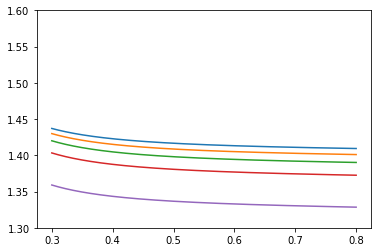

In [420]:
plt.plot(np.squeeze(wavelength),np.squeeze(ri))
plt.yticks(np.arange(1.3, 1.6, 0.05))
plt.show()